# Black-Scholes Model and Monte Carlo simulation

The notation for all variables:

$S_t$: the spot price of the underlying asset at time t \
r: the risk-free interest rate \
$\sigma$: the volatility of returns of the underlying asset \
K: the strike price or exercise price of the option \
C0: the price of a European call option at time t=0  \
t: current time in years \
T: expiry or maturity \
N: number of realizations for Monte Carlo simulation

In [1]:
import numpy as np  
import scipy.stats as stats 
import matplotlib.pyplot as plt

In [2]:
S0 = 100  
r = 0.05  
sigma = 0.25  
K = 105
T = 1.0  
N = 10000

Text(0, 0.5, 'ferquency')

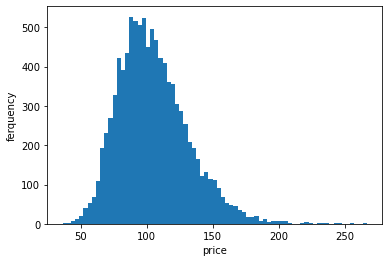

In [3]:
Z = np.random.normal(size=N)
ST = S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*Z)  

plt.hist(ST, bins='auto')  
plt.xlabel('price')
plt.ylabel('ferquency')

In [4]:
weeks = 52  
dt = T/weeks  
S = np.zeros((weeks+1, N))  
S[0] = S0  
for t in range(1, weeks+1):
    Z = np.random.normal(size=N)
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*Z)

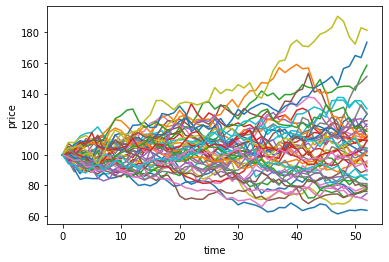

In [5]:
plt.plot(S[:, :50])  
plt.xlabel('time')  
plt.ylabel('price')  
plt.show()

In [6]:
def euro_call(S, K, T, t, r, sigma):
    
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T-t))
    d2 = (np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T-t))    
    call = (S*stats.norm.cdf(d1)-K*np.exp(-r*(T-t))*stats.norm.cdf(d2))
    
    return call

In [7]:
ST = S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*Z)
C0 = np.exp(-r*T)*np.mean(np.maximum(ST-K, 0))

In [8]:
print(f'The price of a European call option by Black-Scholes Model is {euro_call(S0, K, T, 0,  r, sigma)}')
print(f'The price of a European call option by Monte Carlo simulation is {C0}')

The price of a European call option by Black-Scholes Model is 10.00220211715488
The price of a European call option by Monte Carlo simulation is 9.565780766124295
